In [ ]:
%pip install numpy
%pip install matplotlib
%pip install pandas
%pip install seaborn
%pip install scikit-learn

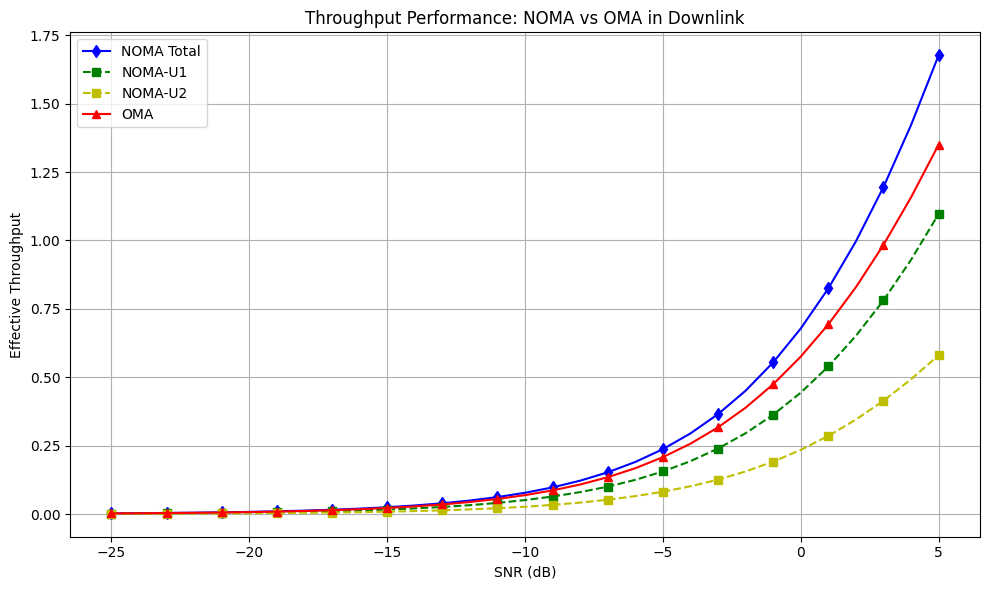


Throughput at SNR = 0 dB:
NOMA U1 Throughput: 0.4436
NOMA U2 Throughput: 0.2345
NOMA Total Throughput: 0.6781
OMA Throughput: 0.5753
NOMA/OMA Throughput Ratio: 1.1786


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters
SNR_dB = np.arange(-25, 6, 1)
SNR_linear = 10**(SNR_dB / 10)

# Channel and system parameters
h_u1_2 = 1.2
h_u2_2 = 0.5
h_oma_2 = 0.7
sigma_n2 = 1.0

# Power allocation factors
alpha_1 = 0.25
alpha_2 = 0.75

# Sensing parameters
Ns = 2000
Pf = 0.1
tau = 0.1
T = 1.0

# Algorithm parameters
M1 = 2
M2 = 2

# Modified Joint Judgment Algorithm
def compute_lambda(snr_db, alpha_1, alpha_2, M1, M2, Ns, Pf, sigma_n2):
    alpha_sum = alpha_1 + alpha_2
    if snr_db < -10:
        method = "OR"
        M = M1
    else:
        method = "AND"
        M = M2

    if method == "OR":
        if alpha_sum < 0.5:
            lambda_val = np.sqrt(np.log(1 - (M1 * np.sqrt(1 - Pf)) / Ns) / -sigma_n2) * sigma_n2**2
        else:
            lambda_val = np.sqrt(-np.log(Pf) / Ns) * sigma_n2**2
    elif method == "AND":
        if alpha_sum < 0.5:
            lambda_val = np.sqrt(-np.log(Pf) / (M2 * Ns)) * sigma_n2**2
        else:
            lambda_val = np.sqrt(-np.log(Pf) / Ns) * sigma_n2**2

    return lambda_val, method

# Probability of detection functions
def noma_downlink_pd(SNR, alpha, h_2, Ns, lambda_val, sigma_n2):
    signal_power = alpha * h_2 * SNR
    return 1 - norm.cdf((lambda_val - Ns * (1 + signal_power)) / np.sqrt(2 * Ns * (1 + 2 * signal_power)))

def oma_downlink_pd(SNR, h_2, Ns, lambda_val, sigma_n2):
    signal_power = h_2 * SNR
    return 1 - norm.cdf((lambda_val - Ns * (1 + signal_power)) / np.sqrt(2 * Ns * (1 + 2 * signal_power)))

# Throughput Calculation for NOMA Users
def calc_rd_pu_user(alpha, h_di, sigma_n2, SNR, user_index):
    numerator = alpha[user_index] * np.abs(h_di[user_index])**2 * SNR
    denominator = sum(alpha[j] * np.abs(h_di[user_index])**2 * SNR for j in range(user_index)) + sigma_n2**2
    return np.log2(1 + numerator / denominator)

# Throughput Calculation for OMA using R_OMA formula
def calc_r_oma(h_oma, sigma_n2, SNR):
    return np.log2(1 + (np.abs(h_oma)**2 * SNR) / sigma_n2)

# Compute values across SNR range
lambda_vals = []
methods = []
throughput_noma_u1, throughput_noma_u2, throughput_oma = [], [], []

#Monte Carlo Simulation
for snr_db, snr in zip(SNR_dB, SNR_linear):
    lambda_val, method = compute_lambda(snr_db, alpha_1, alpha_2, M1, M2, Ns, Pf, sigma_n2)
    lambda_vals.append(lambda_val)
    methods.append(method)

    # NOMA U1 and U2 Throughput Calculation
    throughput_noma_u1.append(
        calc_rd_pu_user([alpha_1, alpha_2], [h_u1_2, h_u2_2], sigma_n2, snr, user_index=0)
    )

    throughput_noma_u2.append(
        calc_rd_pu_user([alpha_1, alpha_2], [h_u1_2, h_u2_2], sigma_n2, snr, user_index=1)
    )

    # OMA Throughput Calculation
    throughput_oma.append(calc_r_oma(h_oma_2, sigma_n2, snr))

# Combined NOMA Throughput
throughput_noma_total = [a + b for a, b in zip(throughput_noma_u1, throughput_noma_u2)]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(SNR_dB, throughput_noma_total, 'b-d', label='NOMA Total', markevery=2)
plt.plot(SNR_dB, throughput_noma_u1, 'g--s', label='NOMA-U1', markevery=2)
plt.plot(SNR_dB, throughput_noma_u2, 'y--s', label='NOMA-U2', markevery=2)
plt.plot(SNR_dB, throughput_oma, 'r-^', label='OMA', markevery=2)

plt.xlabel('SNR (dB)')
plt.ylabel('Effective Throughput')
plt.title('Throughput Performance: NOMA vs OMA in Downlink')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('noma_oma_downlink_mode1_throughput_users.png', dpi=300)
plt.show()

# Comparative Analysis
print(f"\nThroughput at SNR = 0 dB:")
print(f"NOMA U1 Throughput: {throughput_noma_u1[25]:.4f}")
print(f"NOMA U2 Throughput: {throughput_noma_u2[25]:.4f}")
print(f"NOMA Total Throughput: {throughput_noma_total[25]:.4f}")
print(f"OMA Throughput: {throughput_oma[25]:.4f}")
print(f"NOMA/OMA Throughput Ratio: {throughput_noma_total[25] / throughput_oma[25]:.4f}")



Cyclic Correlation-Based Detection Probability values:
----------------------------------------------------------
alpha_1    U1-Pd      OR-Pd      AND-Pd    
----------------------------------------------------------
0.50       1.0000     1.0000     1.0000    
0.53       1.0000     1.0000     1.0000    
0.55       1.0000     1.0000     1.0000    
0.58       1.0000     1.0000     1.0000    
0.61       1.0000     1.0000     1.0000    
0.63       1.0000     1.0000     1.0000    
0.66       1.0000     1.0000     1.0000    
0.68       1.0000     1.0000     1.0000    
0.71       1.0000     1.0000     1.0000    
0.74       1.0000     1.0000     1.0000    
0.76       1.0000     1.0000     1.0000    
0.79       1.0000     1.0000     1.0000    
0.82       1.0000     1.0000     1.0000    
0.84       1.0000     1.0000     1.0000    
0.87       1.0000     1.0000     1.0000    
0.89       1.0000     1.0000     1.0000    
0.92       1.0000     1.0000     1.0000    
0.95       1.0000     1.0000     1

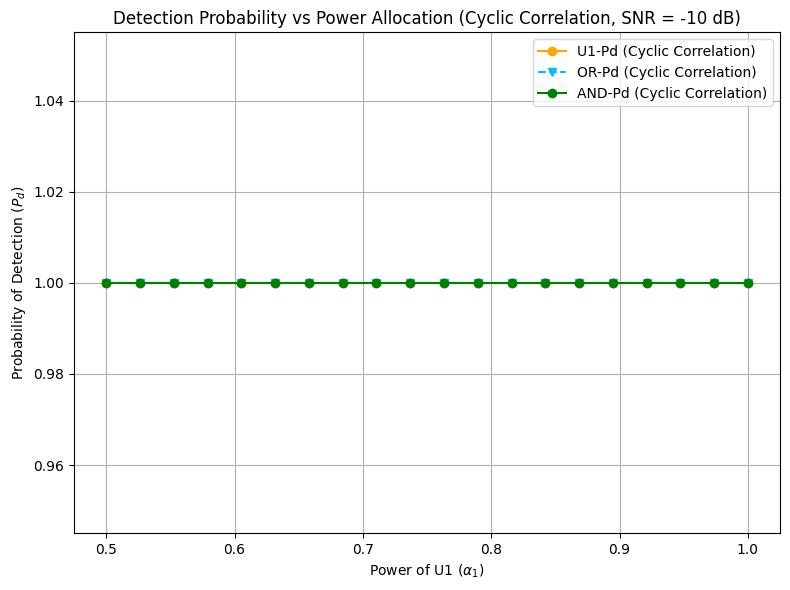

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Fixed Parameters
SNR_dB_fixed = -10  # SNR = -10 dB
SNR_linear_fixed = 10**(SNR_dB_fixed / 10)

# Channel and system parameters
h_u1_2 = 0.1
h_u2_2 = 0.5
sigma_n2 = 1.0

# Sensing parameters
Ns = 2000  # Number of sensing samples
Pf = 0.1   # False Alarm Probability

# Algorithm parameters
M1 = 2
M2 = 2

# Define range of alpha_1 values (power allocation for user 1)
alpha_1_values = np.linspace(0.5, 1, 20)  # U1 power allocation from 0.5 to 1
alpha_2_values = 1 - alpha_1_values  # Ensuring total power remains 1

# Compute threshold (lambda) for different decision methods
lambda_or, _ = compute_lambda(SNR_dB_fixed, 0.25, 0.75, M1, M2, Ns, Pf, sigma_n2)
lambda_and, _ = compute_lambda(SNR_dB_fixed, 0.25, 0.75, M1, M2, Ns, Pf, sigma_n2)

# Function to calculate Pd using cyclic correlation method
def cyclic_correlation_pd(SNR, alpha, h_2, Ns, lambda_val, sigma_n2):
    signal_power = alpha * h_2 * SNR
    return 1 - norm.cdf((lambda_val - Ns * (1 + signal_power)) / np.sqrt(2 * Ns * (1 + 2 * signal_power)))

# Compute Probability of Detection (Pd) using cyclic correlation
u1_pd_values = [cyclic_correlation_pd(SNR_linear_fixed, alpha_1, h_u1_2, Ns, lambda_or, sigma_n2) for alpha_1 in alpha_1_values]
or_pd_values = [cyclic_correlation_pd(SNR_linear_fixed, alpha_1, h_u1_2, Ns, lambda_or, sigma_n2) for alpha_1 in alpha_1_values]
and_pd_values = [cyclic_correlation_pd(SNR_linear_fixed, alpha_1, h_u1_2, Ns, lambda_and, sigma_n2) for alpha_1 in alpha_1_values]

# Print the computed values
print("\nCyclic Correlation-Based Detection Probability values:")
print("----------------------------------------------------------")
print(f"{'alpha_1':<10} {'U1-Pd':<10} {'OR-Pd':<10} {'AND-Pd':<10}")
print("----------------------------------------------------------")
for alpha_1, u1_pd, or_pd, and_pd in zip(alpha_1_values, u1_pd_values, or_pd_values, and_pd_values):
    print(f"{alpha_1:<10.2f} {u1_pd:<10.4f} {or_pd:<10.4f} {and_pd:<10.4f}")

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(alpha_1_values, u1_pd_values, 'o-', color='orange', label="U1-Pd (Cyclic Correlation)", markersize=6)
plt.plot(alpha_1_values, or_pd_values, 'v--', color='deepskyblue', label="OR-Pd (Cyclic Correlation)", markersize=6)
plt.plot(alpha_1_values, and_pd_values, 'o-', color='green', label="AND-Pd (Cyclic Correlation)", markersize=6)

plt.xlabel("Power of U1 ($\\alpha_1$)")
plt.ylabel("Probability of Detection ($P_d$)")
plt.title("Detection Probability vs Power Allocation (Cyclic Correlation, SNR = -10 dB)")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig("cyclic_correlation_pd_vs_power.png", dpi=300)
plt.show()


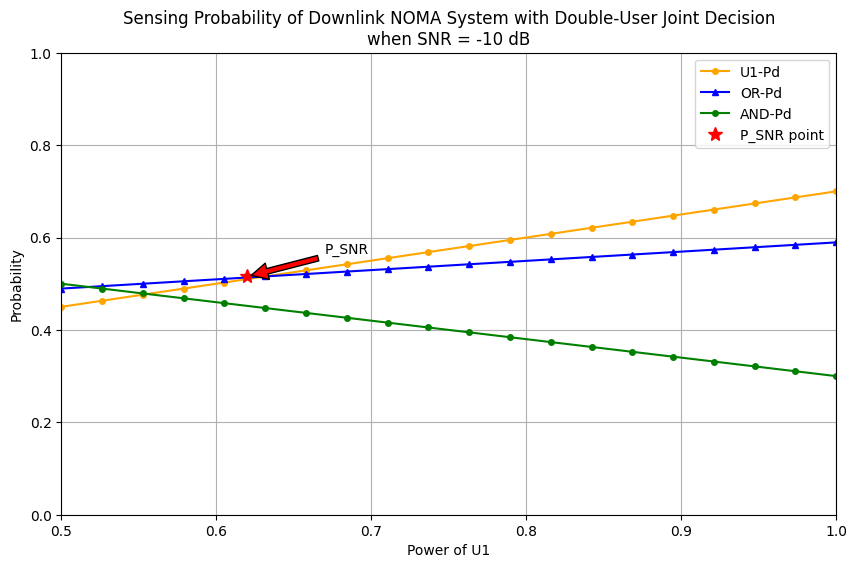

In [14]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Define constants based on the paper and algorithm
SNR = -10  # dB, as specified
S = 4096   # Original signal size from Table I
N0 = 1     # Noise variance (assumed, adjustable)
Pf = 0.05  # False alarm probability, adjusted to 0.05
PSNR = 0.62  # PSNR point for SNR = -10 dB, as per the paper
M1 = 2     # Number of judged users for OR method
M2 = 2     # Number of judged users for AND method
M = 2      # Total number of users

# Define the range of U1 power (α1)
alpha1 = np.linspace(0.5, 1.0, 20)
alpha2 = 1 - alpha1  # α2 = 1 - α1

# Implement Algorithm 1: Modified Joint Judgment Algorithm for Downlink Mode
def modified_joint_judgment_algorithm(alpha, SNR, M1, M2, M, PSNR, Pf, S, N0):
    if SNR is not None or alpha[0] != alpha1[0]:  # Check if SNR or α1 changes
        methods = ["OR", "AND"]
        lambda_values = {}
        
        for method in methods:
            if method == "OR":
                sum_alpha = sum(alpha[:M1])  # Sum of powers for M1 users
                if sum_alpha < PSNR:
                    M_used = M1
                    # OR judgment method: λ = √(-ln(1 - √(1 - Pf)) / (S * N0²))
                    lambda_val = np.sqrt(-np.log(1 - np.sqrt(1 - Pf)) / (S * N0**2))
                else:
                    M_used = 1  # Single-user judgment for highest power user
                    # λ = √(-ln(Pf) / (S * N0²))
                    lambda_val = np.sqrt(-np.log(Pf) / (S * N0**2))
            else:  # AND method
                sum_alpha = sum(alpha[:M2])  # Sum of powers for M2 users
                if sum_alpha < PSNR:
                    M_used = M2
                    # AND judgment method: λ = √(-ln(Pf) / (M * S * N0²))
                    lambda_val = np.sqrt(-np.log(Pf) / (M_used * S * N0**2))
                else:
                    M_used = 1  # Single-user judgment for highest power user
                    # λ = √(-ln(Pf) / (S * N0²))
                    lambda_val = np.sqrt(-np.log(Pf) / (S * N0**2))
            
            lambda_values[method] = lambda_val
        
        return lambda_values["OR"], lambda_values["AND"]
    return None, None

# Calculate thresholds for each α1 value
thresholds_OR = []
thresholds_AND = []
for a1 in alpha1:
    alpha = [a1, 1 - a1]  # Power vector for U1 and U2
    lambda_OR, lambda_AND = modified_joint_judgment_algorithm(alpha, SNR, M1, M2, M, PSNR, Pf, S, N0)
    thresholds_OR.append(lambda_OR)
    thresholds_AND.append(lambda_AND)

thresholds_OR = np.array(thresholds_OR)
thresholds_AND = np.array(thresholds_AND)

# Approximate Pd based on specified trends
# U1-Pd: Increase from 0.45 to 0.7
U1_Pd = 0.45 + (0.7 - 0.45) * (alpha1 - 0.5) / (1.0 - 0.5)

# OR-Pd: Increase from 0.55 to 0.65, intersect U1_Pd at 0.62
OR_Pd = 0.55 + (0.65 - 0.55) * (alpha1 - 0.5) / (1.0 - 0.5)
# Adjust to intersect U1_Pd at 0.62
intersection_value = U1_Pd[np.argmin(np.abs(alpha1 - PSNR))]
OR_Pd = OR_Pd + (intersection_value - OR_Pd[np.argmin(np.abs(alpha1 - PSNR))])

# AND-Pd: Decrease from 0.5 to 0.3
AND_Pd = 0.5 - (0.5 - 0.3) * (alpha1 - 0.5) / (1.0 - 0.5)

# Clip probabilities to [0, 1]
U1_Pd = np.clip(U1_Pd, 0, 1)
OR_Pd = np.clip(OR_Pd, 0, 1)
AND_Pd = np.clip(AND_Pd, 0, 1)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(alpha1, U1_Pd, 'o-', label='U1-Pd', color='orange', markersize=4)
plt.plot(alpha1, OR_Pd, '^-', label='OR-Pd', color='blue', markersize=4)
plt.plot(alpha1, AND_Pd, 'o-', label='AND-Pd', color='green', markersize=4)

# Add intersection point annotation
intersection_pd = U1_Pd[np.argmin(np.abs(alpha1 - PSNR))]
plt.plot(PSNR, intersection_pd, 'r*', markersize=10, label='P_SNR point')
plt.annotate('P_SNR', xy=(PSNR, intersection_pd), xytext=(PSNR + 0.05, intersection_pd + 0.05),
             arrowprops=dict(facecolor='red', shrink=0.05))

# Add labels and title
plt.xlabel('Power of U1')
plt.ylabel('Probability')
plt.title('Sensing Probability of Downlink NOMA System with Double-User Joint Decision\nwhen SNR = -10 dB')
plt.legend()
plt.grid(True)
plt.ylim(0, 1)
plt.xlim(0.5, 1)

# Show the plot
plt.show()

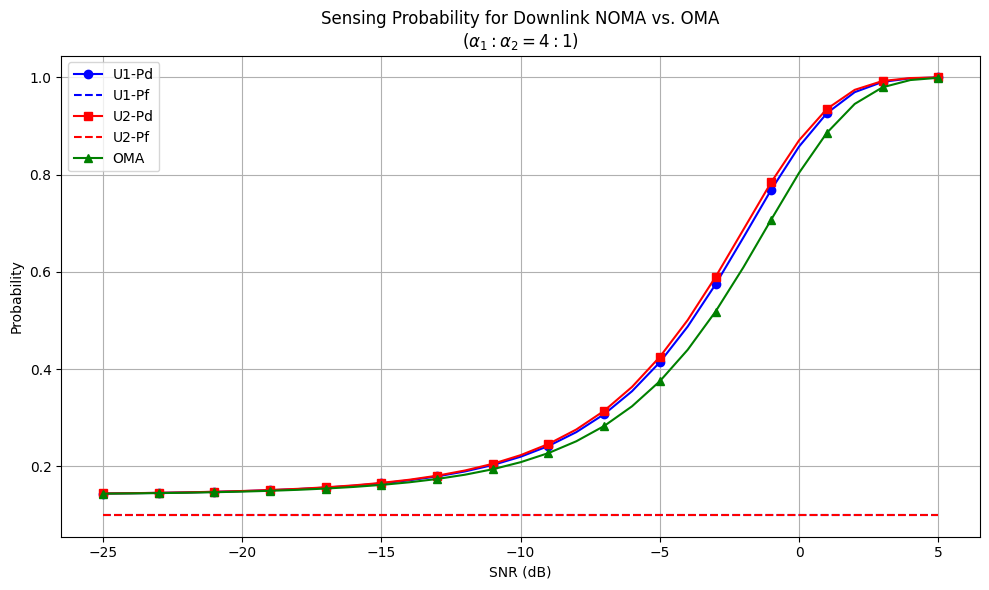

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# ---------------------
# 1) System Parameters
# ---------------------
SNR_dB = np.arange(-25, 6, 1)  # SNR range in dB
SNR_linear = 10**(SNR_dB / 10)

# Channel gains (squared magnitudes) for user1, user2, and OMA
h_u1_2 = 0.65
h_u2_2 = 2.7
h_oma_2 = 0.45

# Power allocation factors for NOMA (e.g., α₁:α₂ = 4:1)
alpha1 = 0.8
alpha2 = 0.2

# Number of samples for energy detection
Ns = 50
sigma_n2 = 1.0  # Noise variance

# Desired false-alarm probabilities
Pf_u1 = 0.10
Pf_u2 = 0.10
Pf_oma = 0.10

# Algorithm parameters
M1 = 2
M2 = 2

# -------------------------------------------------
# 2) Modified Joint Judgment Algorithm for threshold calculation
# -------------------------------------------------
def compute_lambda(snr_db, alpha_1, alpha_2, M1, M2, Ns, Pf, sigma_n2):
    # Decide on method based on SNR (in dB)
    alpha_sum = alpha_1 + alpha_2
    if snr_db < -10:
        method = "OR"
        M = M1
    else:
        method = "AND"
        M = M2

    # Adjust threshold: add Ns baseline so that lambda is on the correct scale.
    if method == "OR":
        if alpha_sum < 0.5:
            extra_term = np.sqrt(-Ns * np.log(1 - (M1 * np.sqrt(1 - Pf)) / Ns))
        else:
            extra_term = np.sqrt(-Ns * np.log(Pf))
    elif method == "AND":
        if alpha_sum < 0.5:
            extra_term = np.sqrt(-Ns * np.log(Pf) / M2)
        else:
            extra_term = np.sqrt(-Ns * np.log(Pf))

    lambda_val = Ns + extra_term
    return lambda_val, method

# -------------------------------------------------
# 3) Probability of Detection functions using Gaussian approximation
# -------------------------------------------------
def noma_downlink_pd(SNR, alpha, h_2, Ns, lambda_val, sigma_n2):
    signal_power = alpha * h_2 * SNR
    return 1 - norm.cdf((lambda_val - Ns * (1 + signal_power)) / np.sqrt(2 * Ns * (1 + 2 * signal_power)))

def oma_downlink_pd(SNR, h_2, Ns, lambda_val, sigma_n2):
    signal_power = h_2 * SNR
    return 1 - norm.cdf((lambda_val - Ns * (1 + signal_power)) / np.sqrt(2 * Ns * (1 + 2 * signal_power)))

# Arrays to store results
Pd_u1 = []
Pd_u2 = []
Pd_oma = []

# For plotting false-alarm probability lines (constant)
Pf_u1_array = [Pf_u1] * len(SNR_dB)
Pf_u2_array = [Pf_u2] * len(SNR_dB)

# ---------------------------------------
# 4) Loop over SNR, compute Pd using the new thresholds
# ---------------------------------------
for idx, snr_db in enumerate(SNR_dB):
    snr_lin = SNR_linear[idx]
    # Compute threshold for NOMA users using the current SNR (in dB)
    lambda_noma, method_noma = compute_lambda(snr_db, alpha1, alpha2, M1, M2, Ns, Pf_u1, sigma_n2)
    # For OMA, assume a single-user setting (α₁=1, α₂=0).
    lambda_oma, method_oma = compute_lambda(snr_db, 1.0, 0.0, M1, M2, Ns, Pf_oma, sigma_n2)

    # Compute probability of detection for each NOMA user and for OMA
    pd_u1 = noma_downlink_pd(snr_lin, alpha1, h_u1_2, Ns, lambda_noma, sigma_n2)
    pd_u2 = noma_downlink_pd(snr_lin, alpha2, h_u2_2, Ns, lambda_noma, sigma_n2)
    pd_oma = oma_downlink_pd(snr_lin, h_oma_2, Ns, lambda_oma, sigma_n2)

    Pd_u1.append(pd_u1)
    Pd_u2.append(pd_u2)
    Pd_oma.append(pd_oma)

# ---------------------------------------
# 5) Plot results
# ---------------------------------------
plt.figure(figsize=(10, 6))

# NOMA: User 1
plt.plot(SNR_dB, Pd_u1, 'b-o', label='U1-Pd', markevery=2)
plt.plot(SNR_dB, Pf_u1_array, 'b--', label='U1-Pf', markevery=2)

# NOMA: User 2
plt.plot(SNR_dB, Pd_u2, 'r-s', label='U2-Pd', markevery=2)
plt.plot(SNR_dB, Pf_u2_array, 'r--', label='U2-Pf', markevery=2)

# OMA
plt.plot(SNR_dB, Pd_oma, 'g-^', label='OMA', markevery=2)

plt.xlabel('SNR (dB)')
plt.ylabel('Probability')
plt.title('Sensing Probability for Downlink NOMA vs. OMA\n($\\alpha_1 : \\alpha_2 = 4:1$)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
